In [1]:
from glob import glob 
import os

import numpy as np

import matplotlib.pyplot as plt

In [70]:
xp = np.linspace(0.0,100.,51)
print(xp)

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.]


In [71]:
zp = np.linspace(0.0,10.,51)

In [72]:
def compute_localization(coords, ob_loc=0.5, vert_norm=0.2, cutoff=1.0):

    def gc_lt1(r):
        return (((-0.25*r +0.5)*r + 0.625)*r - (5.0/3.0))*r**2 + 1.0

    def gc_lt2(r):
        return (((((r/12.0) - 0.5)*r +0.625)*r + (5.0/3.0))*r -5.0)*r + 4.0 - 2.0 / (3.0 * r)

    print('Location of Ob:  {0}'.format(ob_loc))
    location_diff = (coords - ob_loc)/vert_norm

    local = np.zeros((location_diff.shape))

    location_diff  = np.abs( location_diff )

    r = location_diff / cutoff

    local = np.where(r < 2.0*cutoff, gc_lt2(r), local)

    local = np.where(r <     cutoff, gc_lt1(r), local)

    return local
    
def compute_localization2(c_x, c_z, ob_loc=[0.5,0.5], vert_norm=[0.2,0.2], cutoff=1.0):

    def gc_lt1(r):
        return (((-0.25*r +0.5)*r + 0.625)*r - (5.0/3.0))*r**2 + 1.0

    def gc_lt2(r):
        return (((((r/12.0) - 0.5)*r +0.625)*r + (5.0/3.0))*r -5.0)*r + 4.0 - 2.0 / (3.0 * r)

    print('Location of Ob:  {0}'.format(ob_loc))
    
    location_x = (c_x - ob_loc[0])/vert_norm[0]

    location_z = (c_z - ob_loc[1])/vert_norm[1]

    location_diff  = np.sqrt(location_x**2 + location_z**2)

    local = np.zeros((location_diff.shape))

    r = location_diff / cutoff

    local = np.where(r < 2.0*cutoff, gc_lt2(r), local)

    local = np.where(r <     cutoff, gc_lt1(r), local)

    return local

In [73]:
xx, zz = np.meshgrid(xp, zp)

Location of Ob:  50
Location of Ob:  3


/tmp/ipykernel_2543503/1443217030.py:7: RuntimeWarning: divide by zero encountered in divide
  return (((((r/12.0) - 0.5)*r +0.625)*r + (5.0/3.0))*r -5.0)*r + 4.0 - 2.0 / (3.0 * r)
/tmp/ipykernel_2543503/1743849546.py:4: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xx, zz, gsi_loc, c='#539ecd',zorder=10);


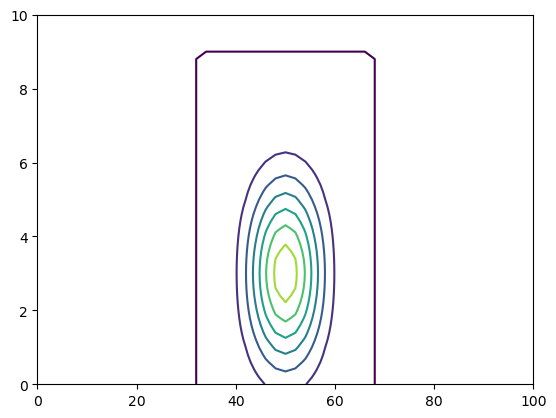

In [76]:
locx = compute_localization(xx, ob_loc=50, vert_norm=9., cutoff=1.0);
locz = compute_localization(zz, ob_loc=3, vert_norm=3., cutoff=1.0);
gsi_loc = locx * locz
plt.contour(xx, zz, gsi_loc, c='#539ecd',zorder=10);

Location of Ob:  [50, 3]


/tmp/ipykernel_2543503/1443217030.py:31: RuntimeWarning: divide by zero encountered in divide
  return (((((r/12.0) - 0.5)*r +0.625)*r + (5.0/3.0))*r -5.0)*r + 4.0 - 2.0 / (3.0 * r)
/tmp/ipykernel_2543503/2083844382.py:2: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xx, zz, dart_loc, c='#539ecd', zorder=10);


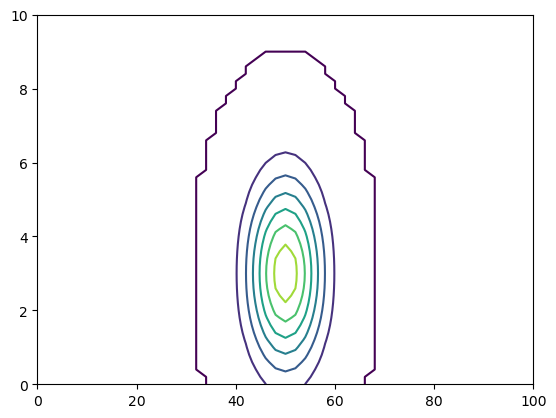

In [77]:
dart_loc = compute_localization2(xx, zz, ob_loc=[50,3], vert_norm=[9.,3.], cutoff=1.0)
plt.contour(xx, zz, dart_loc, c='#539ecd', zorder=10);

/tmp/ipykernel_2543503/3684834548.py:1: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xx, zz, dart_loc-gsi_loc, c='#539ecd', zorder=10);


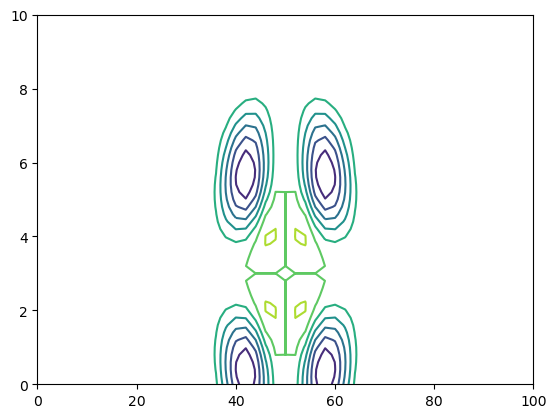

In [79]:
plt.contour(xx, zz, dart_loc-gsi_loc, c='#539ecd', zorder=10);